# Fake New Dectection USing Dataset 3

In [1]:
import numpy as np
import pandas as pd
import re,string,unicodedata
import os

# NLP Libs
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
#from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ML Algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             matthews_corrcoef,
                             cohen_kappa_score,
                             roc_auc_score)

In [5]:
# Import our data

df = pd.read_csv("../dataset/WELFake_dataset/WELFake_Dataset.csv")

# Data Analysis

In [6]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [7]:
# Invert the labels: 0 to 1 and 1 to 0
df['label'] = 1 - df['label']

In [8]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,0
1,1,NaN,Did they post their votes for Hillary already?,0
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",0
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,1
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",0
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,0
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,0
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,0
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",0
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",0


In [9]:
df.shape

(72134, 4)

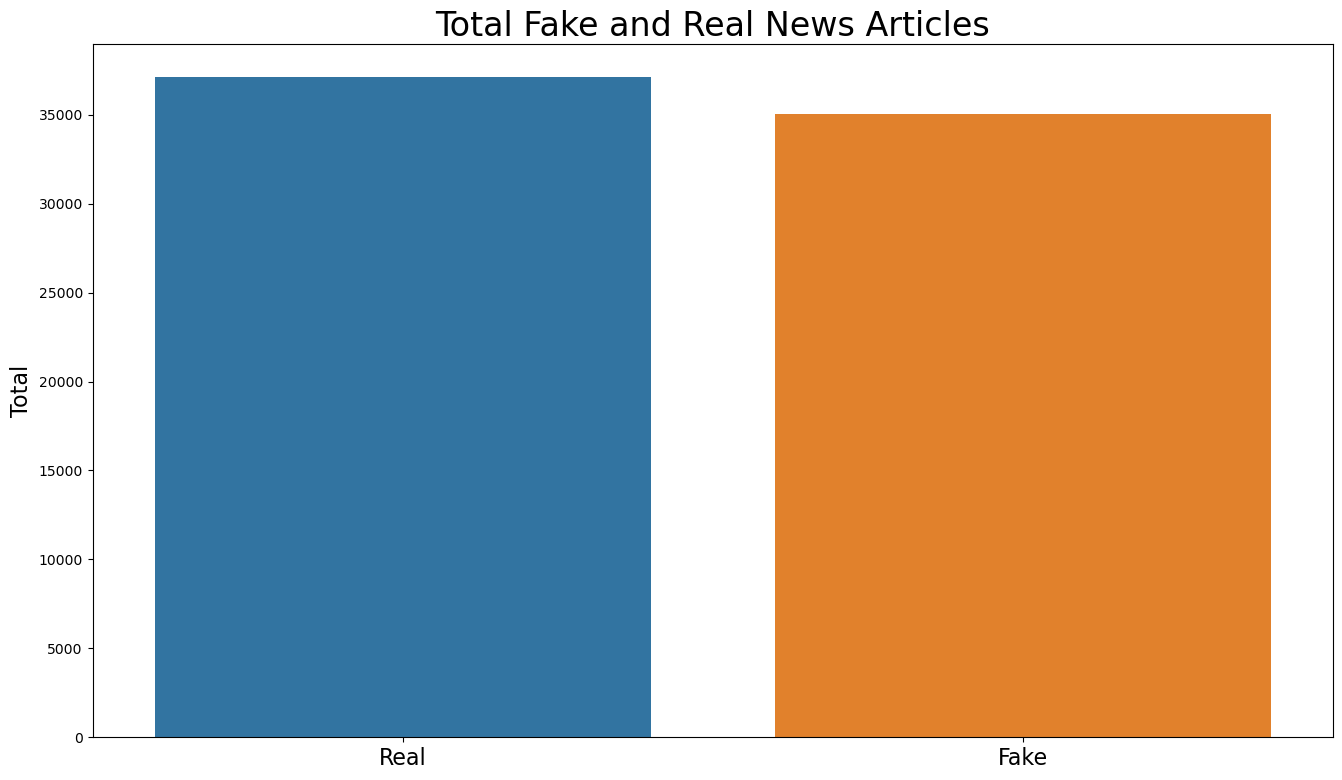

In [10]:
# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

#sns.countplot(df.label)
sns.countplot(data=df, x='label')

plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([1, 0], ['Fake', 'Real'], fontsize=16)

plt.show()

In [11]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [12]:
print(df.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [13]:
df.sample(10)

,Unnamed: 0,title,text,label
33379,33379,Why Negotiators At Paris Climate Talks Are Tos...,Why Negotiators At Paris Climate Talks Are Tos...,1
57783,57783,WORLD WAR 3 – HILLARY V.S. TRUMP,,0
12532,12532,MN: Mayoral Candidate Wants To DISARM COPS Aft...,Minneapolis mayoral candidate Raymond Dehn pr...,0
46819,46819,Republicans try to pick up the pieces after he...,WASHINGTON (Reuters) - The seven-year Republic...,1
61020,61020,DEMOCRATIC DEBATE MODERATOR Met With Dem Candi...,So the moderator of the Democratic debate met ...,0
22411,22411,PICTURE OF Cop Walking Son To School On Day He...,"So what s worse, Barack Obama remaining silent...",0
17715,17715,Factbox: Proposals of main parties in Honduras...,TEGUCIGALPA (Reuters) - Hondurans vote on Sund...,1
17914,17914,Migrants flee to nearby port towns after Calai...,16 mins ago 0 Views 0 Comments 0 Likes Drone f...,0
57486,57486,Trump Gets His A** Handed To Him After Whinin...,Donald Trump is definitely protesting too much...,0
36908,36908,Kanye Tour Cancelled After Pro-Trump Rants. UP...,Just a few days after launching into a 40-minu...,0


In [14]:
print(df.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [16]:
df=df.fillna(' ')
# Now we'll create the Corpus that will be used in our NLP model

# This will create a single column with all the relevant text

df['total']=df['title']+' '+df['text']

In [17]:
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
total         0
dtype: int64


In [18]:
df = df.drop(['Unnamed: 0', 'title','text'],axis = 1)

In [19]:
df.head()

,label,total
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,0,Did they post their votes for Hillary already?
2,0,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,1,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,0,SATAN 2: Russia unvelis an image of its terrif...


# Cleaning and preprocessing

In [20]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [21]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''

    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    words = nltk.word_tokenize(sentence) #tokenization
    words = [w.lower() for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    df.loc[index,'total'] = filter_sentence

KeyboardInterrupt: 

In [ ]:
df.head()

In [ ]:
df.to_csv("../dataset/WELFake_dataset/cleaned_dataset.csv")

# Vectorization

In [21]:
X_train = df['total']
Y_train = df['label']

In [22]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [23]:
tf_idf_matrix

<72134x370364 sparse matrix of type '<class 'numpy.float64'>'
	with 15410761 stored elements in Compressed Sparse Row format>

# Modeling

In [24]:
test_counts = count_vectorizer.transform(df['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)


from sklearn.model_selection import StratifiedShuffleSplit

# Sample data (replace this with your dataset)
X = tf_idf_matrix  # Features
y = Y_train    # Target labels (0 or 1)

# Create an instance of StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)


# Perform the split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Now, X_train and y_train contain the training data and labels, and X_test and y_test contain the test data and labelss

In [25]:
print(X_train.shape, X_test.shape)

(57707, 370364) (14427, 370364)


In [26]:
print(y_train.shape, y_test.shape)

(57707,) (14427,)


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Training and Evaluation

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Model Precison:  0.9794649313087491
Model Recall Score:  0.9667427918926634
Model F1 Score:  0.97306228000862
Model Accuracy Score:  0.9740070700769391
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7421
           1       0.98      0.97      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



C:\Users\Dac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


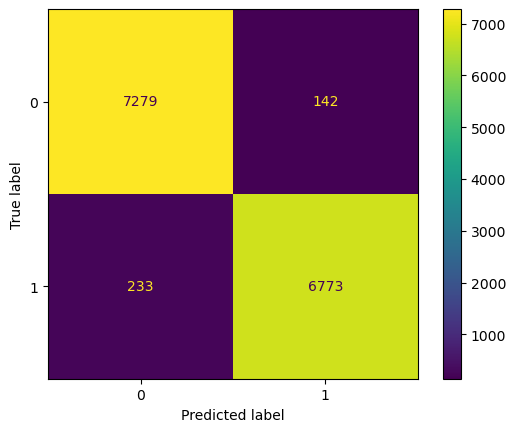

In [28]:
# DEMO
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('====================================')
print('Model Precison: ', precision_score(y_test, pred))
print('Model Recall Score: ', recall_score(y_test, pred))
print('Model F1 Score: ', f1_score(y_test, pred))
print('Model Accuracy Score: ', accuracy_score(y_test, pred))
print('====================================')
print('classification_report: ')
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [29]:
def get_evaluation_result(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    mcc = matthews_corrcoef(y_test, pred)
    kappa = cohen_kappa_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('Accuracy of Logistic classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
    print('Accuracy of Logistic classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    print('====================================')
    # Print the results
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print(f"Cohen's Kappa: {kappa}")
    print(f"AUC-ROC: {roc_auc}")
    print('====================================')
    print('classification_report: ')
    print(classification_report(y_test, pred))
    
    cm = confusion_matrix(y_test, pred)
    cm
    ConfusionMatrixDisplay.from_predictions(y_test,pred)

# 1. “lbfgs” Logistic Regression

C:\Users\Dac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9615997781936647
Precision: 0.9657811146404851
Recall: 0.954753068798173
F1 Score: 0.9602354292276774
Matthews Correlation Coefficient: 0.9231683104363861
Cohen's Kappa: 0.9231114056805007
AUC-ROC: 0.9614083360430699
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



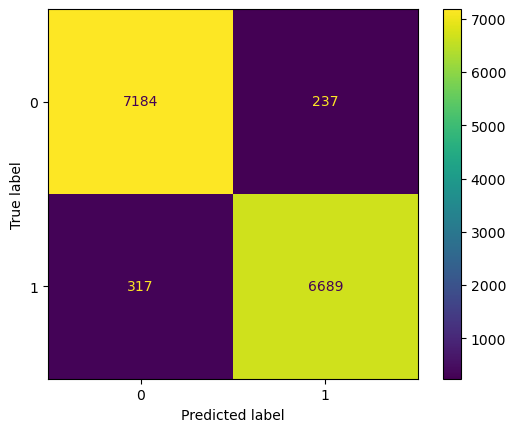

In [30]:
from sklearn.linear_model import LogisticRegression
lbfgs = LogisticRegression(solver='lbfgs')

get_evaluation_result(lbfgs, X_train, X_test, y_train, y_test)

# 2. “liblinear” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9615304637138699
Precision: 0.9656416919301285
Recall: 0.954753068798173
F1 Score: 0.9601665111605541
Matthews Correlation Coefficient: 0.9230284072534147
Cohen's Kappa: 0.922972925120048
AUC-ROC: 0.9613409596786985
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



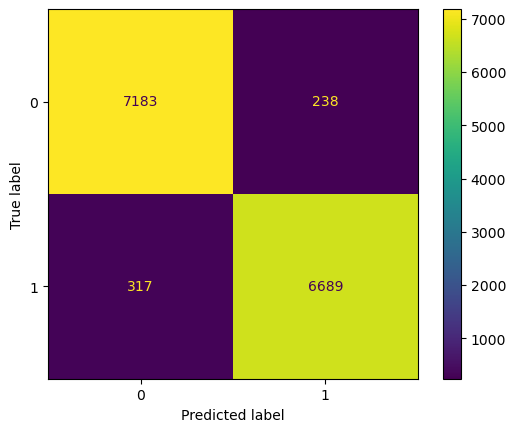

In [31]:
liblinear = LogisticRegression(solver='liblinear')

get_evaluation_result(liblinear, X_train, X_test, y_train, y_test)

# 3. “newton-cg” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9615304637138699
Precision: 0.9656416919301285
Recall: 0.954753068798173
F1 Score: 0.9601665111605541
Matthews Correlation Coefficient: 0.9230284072534147
Cohen's Kappa: 0.922972925120048
AUC-ROC: 0.9613409596786985
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



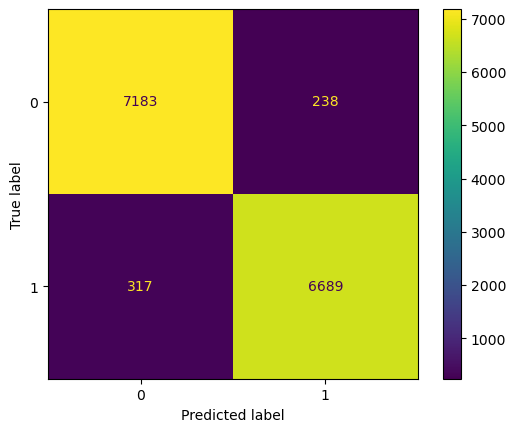

In [32]:
newton_cg = LogisticRegression(solver='newton-cg')

get_evaluation_result(newton_cg, X_train, X_test, y_train, y_test)

# 4. “sag” Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9615997781936647
Precision: 0.9657811146404851
Recall: 0.954753068798173
F1 Score: 0.9602354292276774
Matthews Correlation Coefficient: 0.9231683104363861
Cohen's Kappa: 0.9231114056805007
AUC-ROC: 0.9614083360430699
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



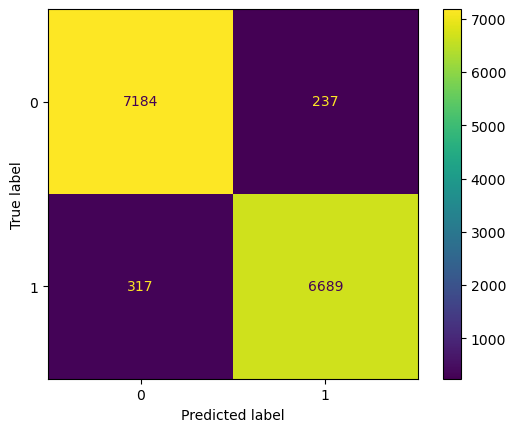

In [33]:
sag = LogisticRegression(solver='sag')

get_evaluation_result(sag, X_train, X_test, y_train, y_test)

# 5. Random Forest Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.941567893532959
Precision: 0.9499196963060301
Recall: 0.9286326006280331
F1 Score: 0.9391555395164202
Matthews Correlation Coefficient: 0.8831754906579354
Cohen's Kappa: 0.8829656743342295
AUC-ROC: 0.9412062073346337
classification_report: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7421
           1       0.95      0.93      0.94      7006

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



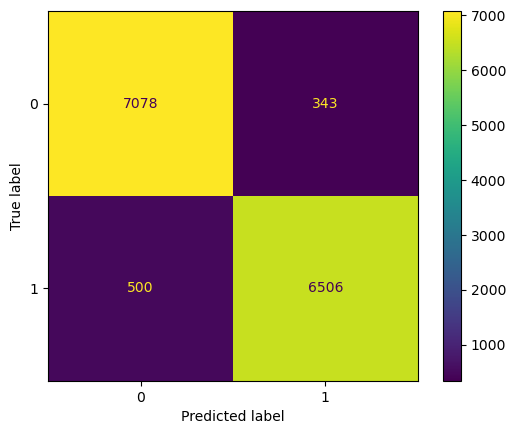

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

get_evaluation_result(rf, X_train, X_test, y_train, y_test)

# 6. Perceptron

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9682539682539683
Precision: 0.9678479565590169
Recall: 0.9667427918926634
F1 Score: 0.9672950585546988
Matthews Correlation Coefficient: 0.9364539041571726
Cohen's Kappa: 0.9364533272695875
AUC-ROC: 0.9682117139627715
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7421
           1       0.97      0.97      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



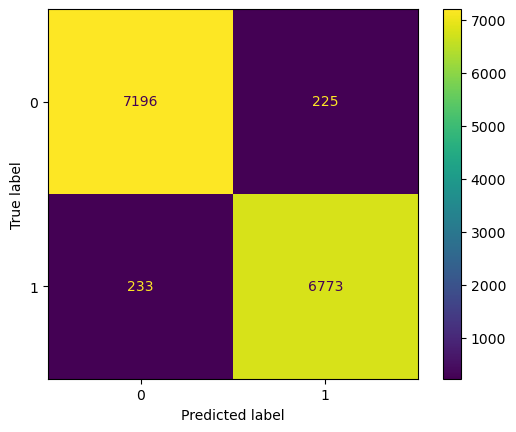

In [35]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
get_evaluation_result(perceptron, X_train, X_test, y_train, y_test)

# 7. RidgeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9728980384002218
Precision: 0.979278365454282
Recall: 0.9646017699115044
F1 Score: 0.9718846624002301
Matthews Correlation Coefficient: 0.9458289012659032
Cohen's Kappa: 0.9457284454105922
AUC-ROC: 0.972666064850645
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7421
           1       0.98      0.96      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



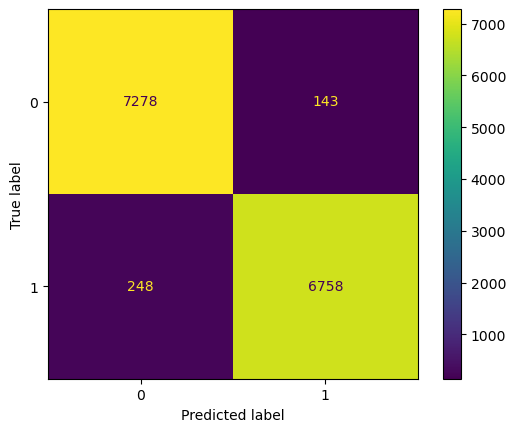

In [36]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier(alpha=1.0, solver='auto', random_state=0)
get_evaluation_result(ridge_classifier, X_train, X_test, y_train, y_test)

# 8. CatBoostClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9586885700422818
Precision: 0.9722959033303861
Recall: 0.941764202112475
F1 Score: 0.9567865429234338
Matthews Correlation Coefficient: 0.9176643896466992
Cohen's Kappa: 0.9172360477663328
AUC-ROC: 0.9582153445544184
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7421
           1       0.97      0.94      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



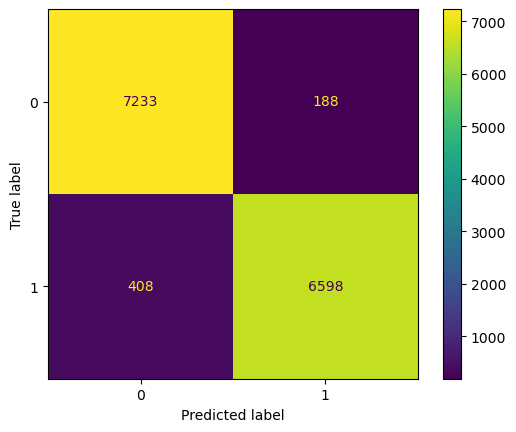

In [37]:
from catboost import CatBoostClassifier
# Create a CatBoostClassifier instance with specified hyperparameters
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=0)

get_evaluation_result(catboost_classifier, X_train, X_test, y_train, y_test)

# 9. NearestCentroidClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.8662230539959798
Precision: 0.8899815611555009
Recall: 0.8267199543248644
F1 Score: 0.857185141334912
Matthews Correlation Coefficient: 0.7334511151298463
Cohen's Kappa: 0.7316912628540085
AUC-ROC: 0.8651185002725251
classification_report: 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7421
           1       0.89      0.83      0.86      7006

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427



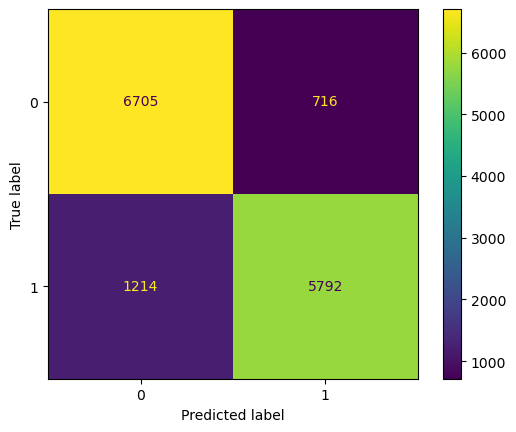

In [38]:
from sklearn.neighbors import NearestCentroid
ncc = NearestCentroid()

get_evaluation_result(ncc, X_train, X_test, y_train, y_test)

# 10. Stochastic Gradient Descent (SGDClassifier)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9606986899563319
Precision: 0.9680186073557203
Recall: 0.950471024835855
F1 Score: 0.9591645660785021
Matthews Correlation Coefficient: 0.9214355922603272
Cohen's Kappa: 0.9212923921056475
AUC-ROC: 0.9604127122562243
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



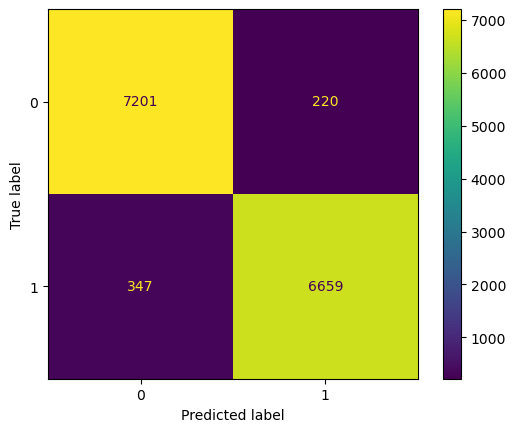

In [39]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()

get_evaluation_result(sgd_classifier, X_train, X_test, y_train, y_test)

# 11. SVC (kernel=”linear”, C=0.025):

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9209814930338948
Precision: 0.9477862595419847
Recall: 0.8860976306023408
F1 Score: 0.9159043965771614
Matthews Correlation Coefficient: 0.8432392276925483
Cohen's Kappa: 0.8415437328768693
AUC-ROC: 0.920006098686159
classification_report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7421
           1       0.95      0.89      0.92      7006

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



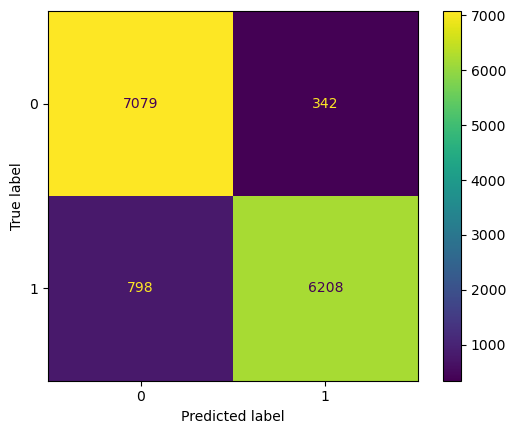

In [40]:
from sklearn.svm import SVC
svm_lin = SVC(kernel="linear", C=0.025)

get_evaluation_result(svm_lin, X_train, X_test, y_train, y_test)

# 12. SVC (gama=2, C=1)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9683925972135579
Precision: 0.9762943571844095
Recall: 0.9581787039680274
F1 Score: 0.9671517072467943
Matthews Correlation Coefficient: 0.9368525616311372
Cohen's Kappa: 0.9367000015067964
AUC-ROC: 0.968107004591479
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7421
           1       0.98      0.96      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



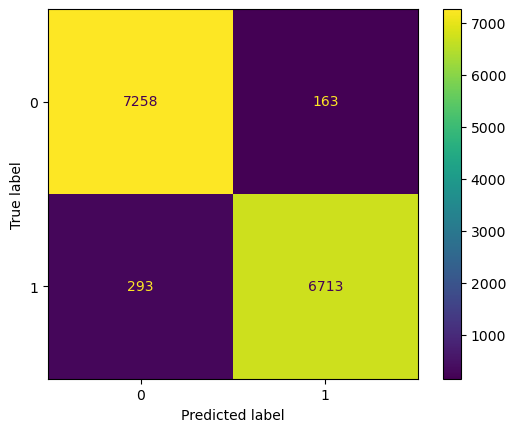

In [41]:
svm_rbf = SVC(kernel="rbf", gamma=2, C=1)

get_evaluation_result(svm_rbf, X_train, X_test, y_train, y_test)

# 13. LinearSVC

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.974838843834477
Precision: 0.9800549212313918
Recall: 0.9678846702826149
F1 Score: 0.9739317773788151
Matthews Correlation Coefficient: 0.9496877565881009
Cohen's Kappa: 0.949618520301515
AUC-ROC: 0.9746443968580573
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7421
           1       0.98      0.97      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.98      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



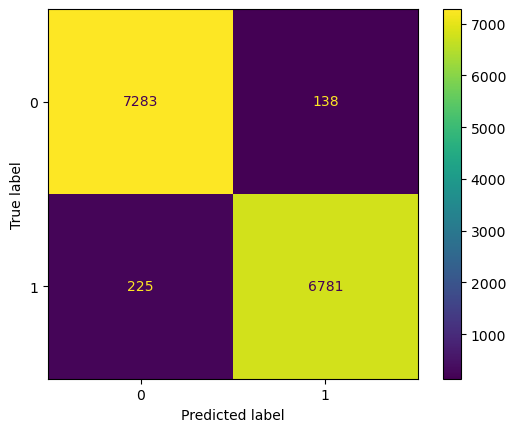

In [42]:
from sklearn.svm import LinearSVC
linear_svm_classifier = LinearSVC(C=1.0, random_state=0)

get_evaluation_result(linear_svm_classifier, X_train, X_test, y_train, y_test)

# 14. SDGClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9605600609967422
Precision: 0.9680093063835975
Recall: 0.9501855552383671
F1 Score: 0.9590146221998127
Matthews Correlation Coefficient: 0.9211618378072324
Cohen's Kappa: 0.9210141330686642
AUC-ROC: 0.9602699774574803
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



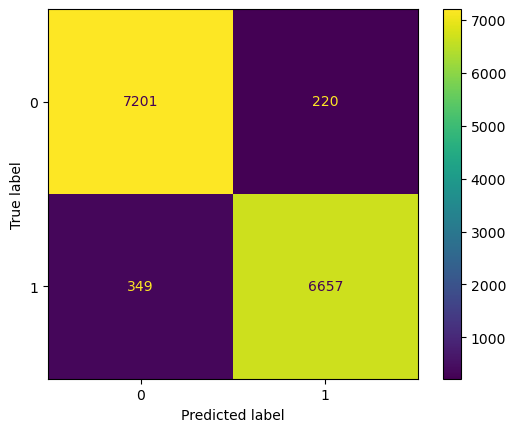

In [43]:
from sklearn.linear_model import SGDClassifier
# Create an SGDClassifier instance with hinge loss (SVM-like behavior), L2 regularization, and an initial learning rate (eta0)
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, eta0=0.01, random_state=0, max_iter=1000)

get_evaluation_result(sgd_classifier, X_train, X_test, y_train, y_test)

# 15. ZeroR

C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: 

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.514382754557427
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Matthews Correlation Coefficient: 0.0
Cohen's Kappa: 0.0
AUC-ROC: 0.5
classification_report: 
              precision    recall  f1-score   support

           0       0.51      1.00      0.68      7421
           1       0.00      0.00      0.00      7006

    accuracy                           0.51     14427
   macro avg       0.26      0.50      0.34     14427
weighted avg       0.26      0.51      0.35     14427



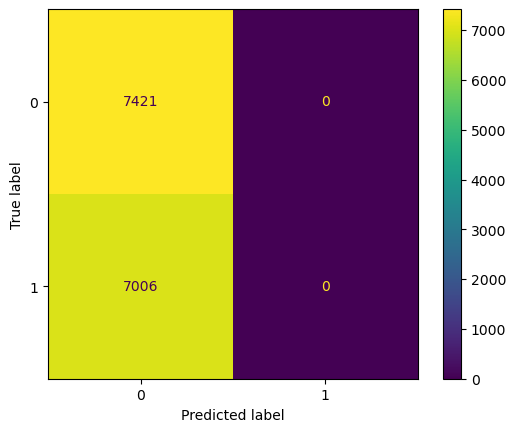

In [44]:
from sklearn.dummy import DummyClassifier

# Create a ZeroR classifier
zeror_model = DummyClassifier(strategy="most_frequent")

get_evaluation_result(zeror_model, X_train, X_test, y_train, y_test)

# 16. DecisionTreeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9456574478408539
Precision: 0.9513929193267556
Recall: 0.9359120753639737
F1 Score: 0.9435890056123183
Matthews Correlation Coefficient: 0.8912869719152183
Cohen's Kappa: 0.8911753764167095
AUC-ROC: 0.9453849556175751
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7421
           1       0.95      0.94      0.94      7006

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



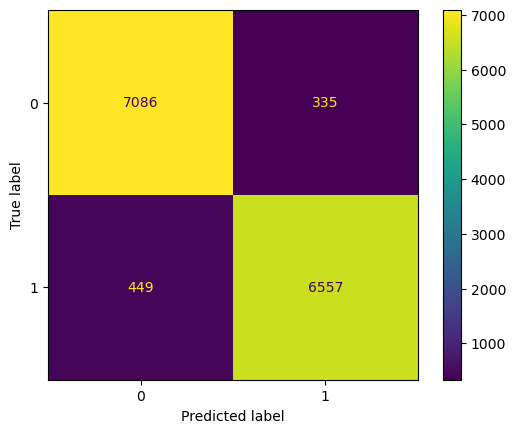

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=0)

get_evaluation_result(dt_classifier, X_train, X_test, y_train, y_test)

# 17.Passive Aggressive (PassiveAggressiveClassifier)

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9726900949608374
Precision: 0.9747271682940839
Recall: 0.9688838138738224
F1 Score: 0.9717967072297781
Matthews Correlation Coefficient: 0.9453418482697299
Cohen's Kappa: 0.9453257924047239
AUC-ROC: 0.9725836668075487
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7421
           1       0.97      0.97      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



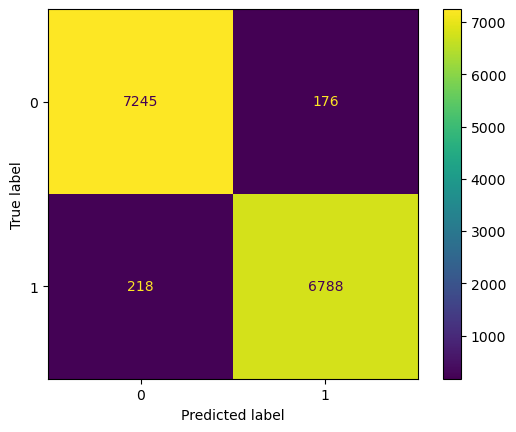

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=0, max_iter=1000)

get_evaluation_result(pa_classifier, X_train, X_test, y_train, y_test)

# 18.ExtraTreeClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9418451514521383
Precision: 0.9299958164830567
Recall: 0.9518983728232944
F1 Score: 0.9408196374409256
Matthews Correlation Coefficient: 0.8839019292736939
Cohen's Kappa: 0.8836705875541836
AUC-ROC: 0.9421262514972153
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7421
           1       0.93      0.95      0.94      7006

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



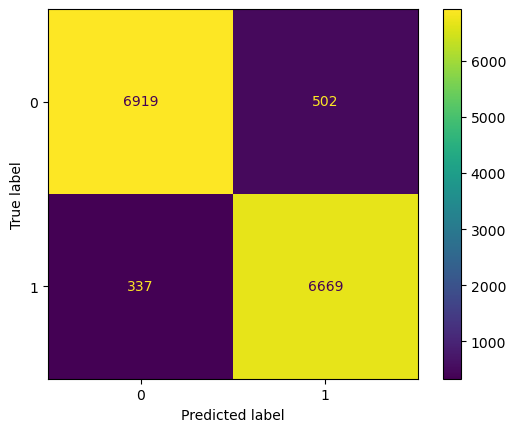

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)

get_evaluation_result(extra_tree_classifier, X_train, X_test, y_train, y_test)

# 19.Random Patches

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9599362306785888
Precision: 0.9804185351270553
Recall: 0.9361975449614616
F1 Score: 0.9577978971962616
Matthews Correlation Coefficient: 0.9205922890650711
Cohen's Kappa: 0.9197048389441304
AUC-ROC: 0.9592724687480803
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7421
           1       0.98      0.94      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



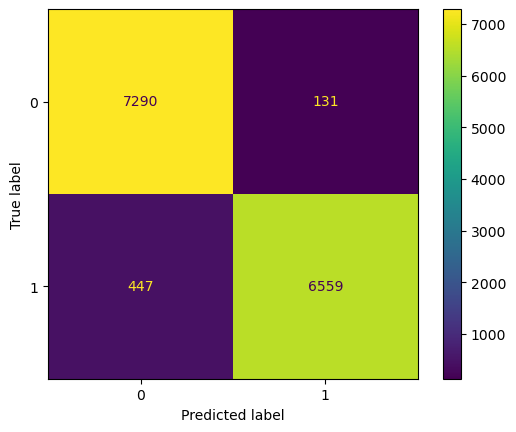

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base learner (e.g., Decision Tree)
base_learner = DecisionTreeClassifier()

# Create a BaggingClassifier with Random Patches
bagging = BaggingClassifier(base_learner, max_samples=0.8, max_features=0.8, n_estimators=10, random_state=42)

get_evaluation_result(bagging, X_train, X_test, y_train, y_test)

# 20.VotingClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9703334026478131
Precision: 0.9755639097744361
Recall: 0.9630316871253212
F1 Score: 0.9692572906191639
Matthews Correlation Coefficient: 0.940669723625588
Cohen's Kappa: 0.9405963317271165
AUC-ROC: 0.9701292379838975
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7421
           1       0.98      0.96      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



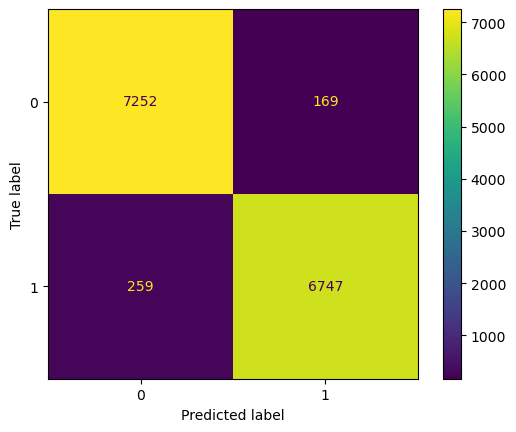

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define individual classifiers
classifier1 = DecisionTreeClassifier()
classifier2 = SVC(probability=True)  # Use probability=True for soft voting
classifier3 = RandomForestClassifier()

# Create a VotingClassifier instance with soft voting
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('svm', classifier2),
    ('random_forest', classifier3)
], voting='soft')  # You can also use 'hard' for hard voting

get_evaluation_result(voting_classifier, X_train, X_test, y_train, y_test)

# 21. Stacked_generalization

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9755319886324253
Precision: 0.9787019715066916
Recall: 0.9707393662574936
F1 Score: 0.9747044070225724
Matthews Correlation Coefficient: 0.9510420616100062
Cohen's Kappa: 0.9510123072376035
AUC-ROC: 0.9753979812017828
classification_report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7421
           1       0.98      0.97      0.97      7006

    accuracy                           0.98     14427
   macro avg       0.98      0.98      0.98     14427
weighted avg       0.98      0.98      0.98     14427



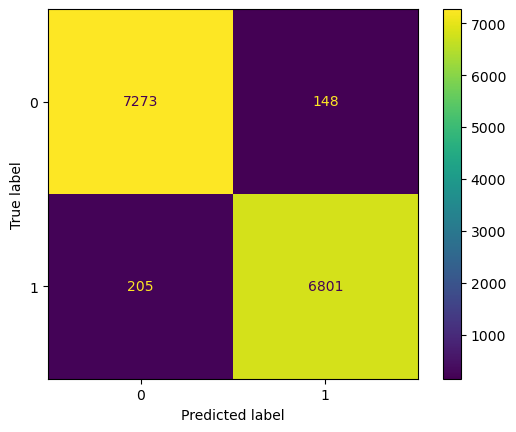

In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('svc', SVC(probability=True)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=0))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create a StackingClassifier instance
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

get_evaluation_result(stacked_model, X_train, X_test, y_train, y_test)

# 22.MLPClassifier:

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9676994524156096
Precision: 0.9714532871972318
Recall: 0.9617470739366257
F1 Score: 0.9665758140869315
Matthews Correlation Coefficient: 0.9353714781082617
Cohen's Kappa: 0.9353273383356612
AUC-ROC: 0.9675330168227799
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7421
           1       0.97      0.96      0.97      7006

    accuracy                           0.97     14427
   macro avg       0.97      0.97      0.97     14427
weighted avg       0.97      0.97      0.97     14427



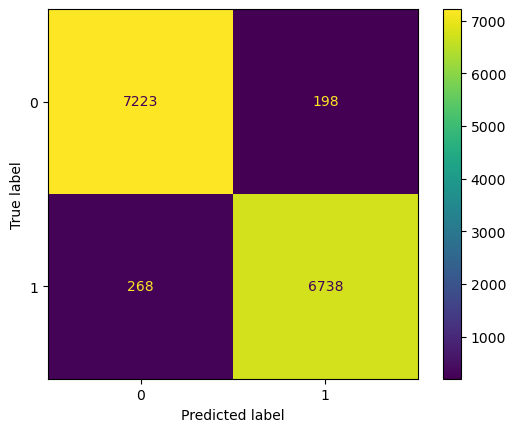

In [51]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier instance with specified architecture and hyperparameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=0)

get_evaluation_result(mlp_classifier, X_train, X_test, y_train, y_test)

# 23.BernoulliRBM:

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9583419976433077
Precision: 0.9700572435050638
Recall: 0.9433342848986583
F1 Score: 0.9565091540632463
Matthews Correlation Coefficient: 0.916880004091601
Cohen's Kappa: 0.91655071953342
AUC-ROC: 0.9579223641175679
classification_report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7421
           1       0.97      0.94      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



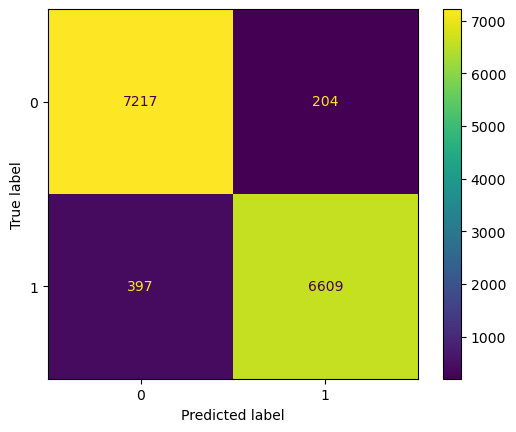

In [52]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)

get_evaluation_result(lgb_classifier, X_train, X_test, y_train, y_test)

# 24.AdaBoostClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.946073334719623
Precision: 0.9530113471050334
Recall: 0.9350556665715102
F1 Score: 0.9439481268011527
Matthews Correlation Coefficient: 0.8921502438368578
Cohen's Kappa: 0.8920004558528598
AUC-ROC: 0.9457652675937998
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7421
           1       0.95      0.94      0.94      7006

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



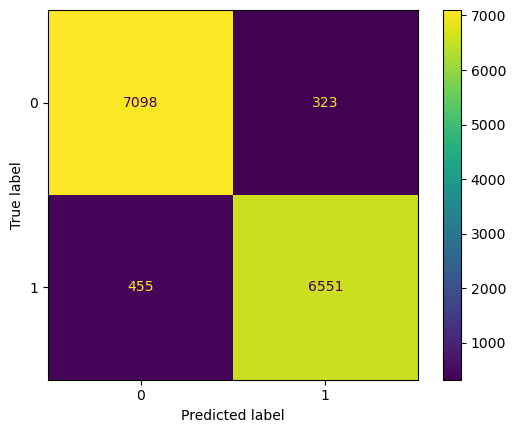

In [53]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0)

get_evaluation_result(adaboost_classifier, X_train, X_test, y_train, y_test)

# 25.GradientBoostingClassifier

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9508560338254661
Precision: 0.9670672007120605
Recall: 0.9304881530117043
F1 Score: 0.9484251109332946
Matthews Correlation Coefficient: 0.9021377862079741
Cohen's Kappa: 0.9015265235668334
AUC-ROC: 0.9502865236154061
classification_report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7421
           1       0.97      0.93      0.95      7006

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



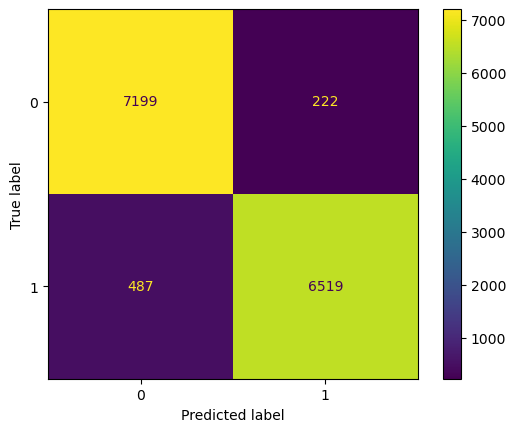

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

get_evaluation_result(gb_classifier, X_train, X_test, y_train, y_test)

# 26.Ordinal Learning Model

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9615304637138699
Precision: 0.9656416919301285
Recall: 0.954753068798173
F1 Score: 0.9601665111605541
Matthews Correlation Coefficient: 0.9230284072534147
Cohen's Kappa: 0.922972925120048
AUC-ROC: 0.9613409596786985
classification_report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7421
           1       0.97      0.95      0.96      7006

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



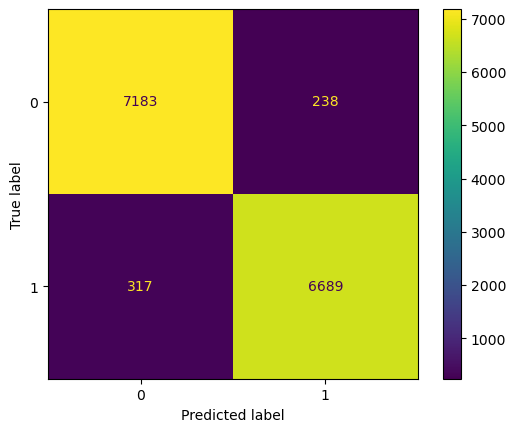

In [55]:
from mord import LogisticAT

# Create and train an Ordinal Logistic Regression model (LogisticAT)
ordinal_classifier = LogisticAT(alpha=1.0)  # You can adjust the regularization parameter alpha

get_evaluation_result(ordinal_classifier, X_train, X_test, y_train, y_test)

# 27.Xgboost

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.9494697442295695
Precision: 0.9679439391680335
Recall: 0.9266343134456181
F1 Score: 0.9468387661343252
Matthews Correlation Coefficient: 0.8995111489220202
Cohen's Kappa: 0.8987349546813805
AUC-ROC: 0.9488312383829627
classification_report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7421
           1       0.97      0.93      0.95      7006

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



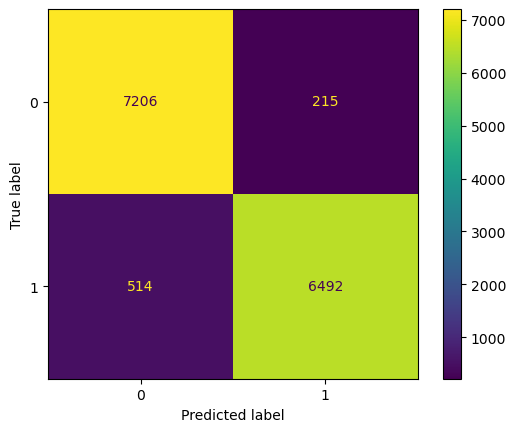

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create an XGBClassifier instance with specified hyperparameters
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

get_evaluation_result(xgb_classifier, X_train, X_test, y_train, y_test)

# 28.Decision Stump

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.8064046579330422
Precision: 0.977123442808607
Recall: 0.6157579217813303
F1 Score: 0.75545048594694
Matthews Correlation Coefficient: 0.65304586091425
Cohen's Kappa: 0.6084396314926099
AUC-ROC: 0.8010739480891559
classification_report: 
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      7421
           1       0.98      0.62      0.76      7006

    accuracy                           0.81     14427
   macro avg       0.85      0.80      0.80     14427
weighted avg       0.85      0.81      0.80     14427



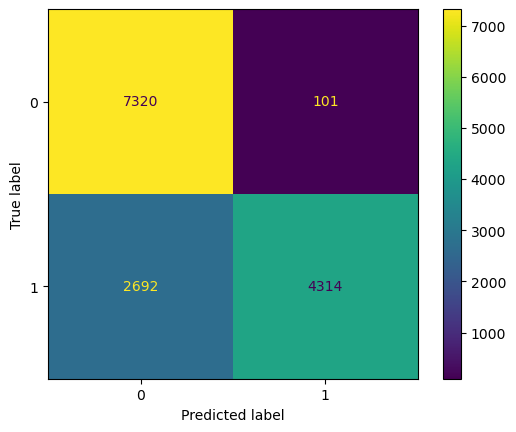

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Stump (a DecisionTreeClassifier with max_depth=1)
decision_stump = DecisionTreeClassifier(max_depth=1)

get_evaluation_result(decision_stump, X_train, X_test, y_train, y_test)

# 29.ComplementNB

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.8807790947528938
Precision: 0.8563915857605178
Recall: 0.9065087068227233
F1 Score: 0.8807377617528774
Matthews Correlation Coefficient: 0.7629820088594783
Cohen's Kappa: 0.7617505796893311
AUC-ROC: 0.8814985253558436
classification_report: 
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7421
           1       0.86      0.91      0.88      7006

    accuracy                           0.88     14427
   macro avg       0.88      0.88      0.88     14427
weighted avg       0.88      0.88      0.88     14427



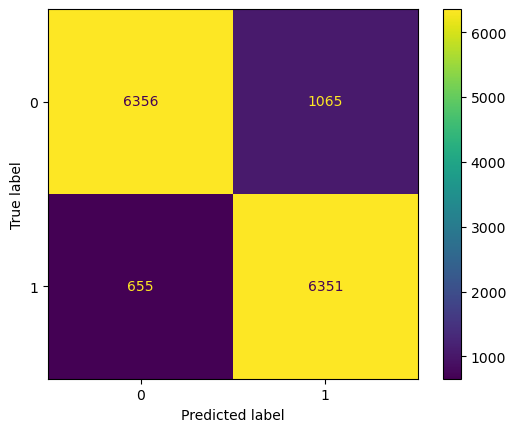

In [58]:
from sklearn.naive_bayes import ComplementNB

# Create a ComplementNB instance
complement_nb_classifier = ComplementNB()
get_evaluation_result(complement_nb_classifier, X_train, X_test, y_train, y_test)

# 30.MultinomialNB

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
Accuracy: 0.8823733277881749
Precision: 0.8622901596833629
Recall: 0.9017984584641736
F1 Score: 0.8816018977185516
Matthews Correlation Coefficient: 0.7656108209820575
Cohen's Kappa: 0.7648530848690531
AUC-ROC: 0.8829164775813659
classification_report: 
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7421
           1       0.86      0.90      0.88      7006

    accuracy                           0.88     14427
   macro avg       0.88      0.88      0.88     14427
weighted avg       0.88      0.88      0.88     14427



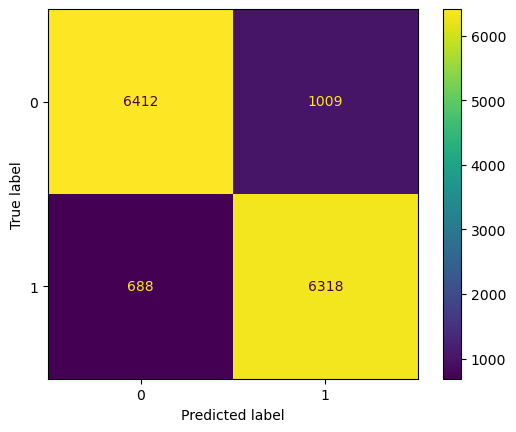

In [59]:
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB instance
multinomial_nb_classifier = MultinomialNB()
get_evaluation_result(multinomial_nb_classifier, X_train, X_test, y_train, y_test)